In [1]:
# Import libraries and dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation

In [2]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = ["BTC-USD", "ETH-USD", "XRP-USD", "BCH-USD", "LTC-USD"],

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "7y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  5 of 5 completed


In [3]:
data.index = pd.to_datetime(data.index)
data.head()

XRP-USD                                        BCH-USD           \
                Open      High       Low     Close   Volume    Open High Low   
Date                                                                           
2014-09-17  0.005123  0.005803  0.005123  0.005399  1281960     NaN  NaN NaN   
2014-09-18  0.005398  0.005521  0.005091  0.005135   491147     NaN  NaN NaN   
2014-09-19  0.005134  0.005167  0.004873  0.004942   407109     NaN  NaN NaN   
2014-09-20  0.004942  0.004954  0.004736  0.004772   322621     NaN  NaN NaN   
2014-09-21  0.004768  0.004791  0.004540  0.004570   309571     NaN  NaN NaN   

                         ...     BTC-USD                                      \
           Close Volume  ...        Open        High         Low       Close   
Date                     ...                                                   
2014-09-17   NaN    NaN  ...  465.864014  468.174011  452.421997  457.334015   
2014-09-18   NaN    NaN  ...  456.859985  456.859985  413.104004  424.440002   
2014-09-19   NaN    NaN  ...  424.102997  427.834991  384.532013  394.795990   
2014-09-20   NaN    NaN  ...  394.673004  423.295990  389.882996  408.903992   
2014-09-21   NaN    NaN  ...  408.084991  412.425995  393.181000  398.821014   

                      LTC-USD                                      
              Volume     Open     High      Low    Close   Volume  
Date                                                               
2014-09-17  21056800  5.08589  5.17077  4.96595  5.05855  3071840  
2014-09-18  34483200  5.06543  5.06543  4.57996  4.68523  4569260  
2014-09-19  37919700  4.68729  4.75582  4.25435  4.32777  3917450  
2014-09-20  36863600  4.32920  4.61608  4.20219  4.28644  5490660  
2014-09-21  26580100  4.26307  4.30013  4.15499  4.24592  2931220  

[5 rows x 25 columns]

In [4]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
data=data.dropna()
MC_even_dist = MCSimulation(
    portfolio_data = data,
    weights = [.25,.25,.25,.25,.25],
    num_simulation = 1000,
    num_trading_days = 252*5
)
MC_even_dist.portfolio_data.head()

XRP-USD                                                        \
                Open      High       Low     Close     Volume daily_return   
Date                                                                         
2017-07-23  0.193568  0.204121  0.188722  0.195058  195682000          NaN   
2017-07-24  0.194979  0.195279  0.189835  0.192002   56632800    -0.015667   
2017-07-25  0.192280  0.192734  0.169797  0.178104  166807008    -0.072385   
2017-07-26  0.177582  0.180872  0.169060  0.173822   76584600    -0.024042   
2017-07-27  0.175210  0.176602  0.171980  0.173457   34575100    -0.002100   

               BCH-USD                                      ...      BTC-USD  \
                  Open        High         Low       Close  ...          Low   
Date                                                        ...                
2017-07-23  555.885986  578.971008  411.776001  413.059998  ...  2653.939941   
2017-07-24  412.579987  578.892029  409.210999  440.700989  ...  2699.189941   
2017-07-25  441.345001  541.658020  338.091003  406.897003  ...  2480.959961   
2017-07-26  407.082001  486.158997  321.791992  365.816010  ...  2450.800049   
2017-07-27  417.097992  460.968994  367.777008  385.479004  ...  2529.340088   

                                                    LTC-USD             \
                  Close      Volume daily_return       Open       High   
Date                                                                     
2017-07-23  2730.399902  1072840000          NaN  46.628201  46.639702   
2017-07-24  2754.860107   866473984     0.008958  44.159599  44.811501   
2017-07-25  2576.479980  1460089984    -0.064751  44.482899  44.788799   
2017-07-26  2529.449951   937404032    -0.018254  42.287998  42.698601   
2017-07-27  2671.780029   789104000     0.056269  42.353199  42.619499   

                                                          
                  Low      Close     Volume daily_return  
Date                                                      
2017-07-23  42.936001  44.055901  219256992          NaN  
2017-07-24  43.287701  44.405499  158532000     0.007935  
2017-07-25  41.067299  42.241299  206307008    -0.048737  
2017-07-26  40.625702  42.229698  121389000    -0.000275  
2017-07-27  41.389301  42.139801   81714000    -0.002129  

[5 rows x 30 columns]

In [5]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.036971,0.955514,0.991267,1.057712,0.998080,1.002590,1.071841,1.053009,1.069878,0.993361,...,1.066311,1.002541,0.999303,1.014713,0.956509,0.982008,1.059715,0.992787,0.896274,1.014254
2,1.045743,0.915681,0.983365,1.084669,1.021466,1.007843,1.077085,1.061192,1.104620,0.977125,...,1.073793,1.051098,1.021602,1.014725,0.951936,0.993274,1.007112,1.009591,0.882170,1.045533
3,1.059049,0.876818,0.937846,1.092049,1.036262,0.962665,1.110005,1.074687,1.086030,1.050695,...,1.136819,1.058300,0.991004,0.994340,0.937671,1.032487,1.003108,1.021077,0.886810,1.091424
4,0.987626,0.901469,0.977819,1.094520,1.045996,0.904747,1.127095,1.031933,1.054535,0.986851,...,1.138296,1.072428,1.057541,1.005181,0.847715,1.027395,1.010514,0.991679,0.852967,1.102697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,43.137094,6.502820,43.260022,22.302492,6.986656,19.020835,40.955301,148.515059,96.801712,28.550443,...,752.422641,11.033551,6.017470,372.958853,23.690937,69.814171,11.315182,2.257232,21.796441,24.772612
1257,40.321708,6.265568,44.268085,22.192801,7.325801,18.539982,41.599235,143.031869,99.339637,28.100897,...,788.162241,10.965883,6.301222,372.812939,23.750218,71.138635,11.020544,2.346534,21.759545,26.385432
1258,38.869179,6.044246,41.437987,20.774093,7.126374,18.273376,42.453857,138.701054,98.688983,27.553797,...,783.051646,10.893051,5.929427,367.180985,23.074767,71.137903,11.458842,2.247694,22.220062,27.014963
1259,36.045154,5.962171,43.425601,21.503379,7.118488,18.001895,42.262625,130.866537,96.768903,26.352677,...,798.062211,9.963729,5.923015,356.372694,22.910346,68.858658,11.260712,2.235101,22.886137,25.810520


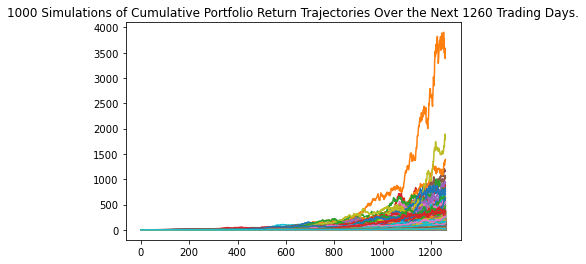

In [6]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

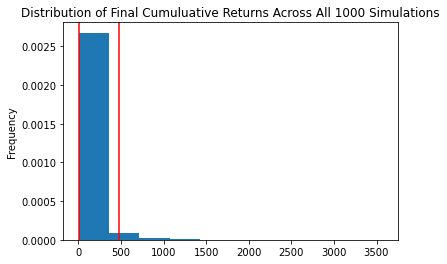

In [7]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_even_dist.plot_distribution()

In [8]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1000.000000
mean              94.683464
std              183.453046
min                1.097841
25%               18.221144
50%               42.312813
75%              101.602933
max             3575.157802
95% CI Lower       4.253220
95% CI Upper     472.134110
Name: 1260, dtype: float64


In [9]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $63798.3 and $7082011.65.
